# Simple Tutorial on Object Recognition 4 Beginner's!
![](https://i0.wp.com/deepomatic.com/wp-content/uploads/2019/05/85384-1z4kp_opo_wiju9srtlv_1a.png?resize=1000%2C297&ssl=1)
There is no real difference between object recognition and image recognition. In fact, they both refer to technologies that can recognize certain targeted subjects through specific algorithms like deep learning. They are strictly related to computer vision, which we define as the art and science of making computers understand images.

In this kernel, we will go thru some basic concepts in object recognition: 

#### What is Object/Image recognition ?

Object recognition consists of recognizing, identifying, and locating objects within a picture with a given degree of confidence.

In this process, the four main tasks are:

* Classification.
* Tagging.
* Detection.
* Segmentation.

#### Classification and tagging

An important task in Object recognition is to identify what is in the image and with what level of confidence. 
![](https://i0.wp.com/deepomatic.com/wp-content/uploads/2019/05/85384-1z4kp_opo_wiju9srtlv_1a.png?resize=1000%2C297&ssl=1)

The mechanism of this task is straightforward. It starts with the definition of the ontology, i.e. the class of objects to detect. Then, both classification and tagging identify what is in the image and the associated level of confidence. 

While **classification** recognizes only one class of objects, **tagging** can recognize multiple ones for a given image.

In **classification** the algorithm will only remember that there is a dog, ignoring all other classes. 

In **tagging**, it will try to return all the best classes corresponding to the image. 

#### Detection and segmentation

Once identified what is in the image, we want to locate the objects. There are two ways to do so: detection and segmentation.
![](https://i0.wp.com/deepomatic.com/wp-content/uploads/2019/05/c74a7-1he3sybzm-ihofw4r39zgra.png?resize=1000%2C297&ssl=1)
Detection outputs a rectangle, also called bounding box, where the objects are. It is a very robust technology, prone to minor errors and imprecisions. 

Segmentation identifies the objects for each pixel  in the image, resulting in a very precise map. However, the accuracy of segmentation depends on an extensive and often time-consuming training of the neural network.

This kernel covers the Object Recognition using CNN, Keras ,Tensorflowworks implementation using image dataset . The following topics will be covered.

### Table Of Contents

#### 1. Loading and preprocess Object dataset
#### 2. Designing and training a CNN model in Keras
#### 3. Plotting the Loss and Accuracy  curve
#### 4. Evaluating the model & Predicting the output class of a test Object
#### 5. Visualizing the intermediate layer output of CNN
#### 6. Plotting the confusion matrix for your result

### 1. Loading and preprocessing own dataset

The dataset that I am using for this kernel is my own accumulated dataset of 7 types of classes namely 
'flowers', 'cars', 'cats', 'horses', 'human', 'bike', 'dogs' with total of 1803 image samples.

In [1]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Using TensorFlow backend.


In [2]:
PATH = os.getcwd()
# Define data path
data_path = '../input/data/data'
data_dir_list = os.listdir(data_path)
data_dir_list

['human', 'dogs', 'bike', 'cars', 'flowers', 'horses', 'cats']

In [3]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=100
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-human

Loaded the images of dataset-dogs

Loaded the images of dataset-bike

Loaded the images of dataset-cars

Loaded the images of dataset-flowers

Loaded the images of dataset-horses

Loaded the images of dataset-cats

(1803, 128, 128)


In [4]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(1803, 128, 128, 1)


Assigning Labels & define the number of classes

In [5]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

Convert class labels to on-hot encoding

In [6]:
Y = np_utils.to_categorical(labels, num_classes)

Shuffle and Split the dataset

In [7]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [8]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1442, 128, 128, 1)
X_test shape = (361, 128, 128, 1)


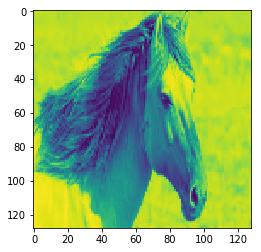

In [9]:
image = X_train[1203,:].reshape((128,128))
plt.imshow(image)
plt.show()

### 2. Designing and training a CNN model in Keras

In [10]:
#Initialising the input shape
input_shape=img_data[0].shape
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(32,3,3,border_mode ='same',activation='relu',input_shape = input_shape),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation = 'softmax')
])

**Compiling the model**

In [11]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

### View Model Configuration

In [12]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16257152  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Train the model

In [13]:
hist = cnn_model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

Train on 1442 samples, validate on 361 samples
Epoch 1/100
1442/1442 [==============================] - 56s 38ms/step - loss: 2.0545 - acc: 0.2705 - val_loss: 1.7050 - val_acc: 0.3019
Epoch 2/100
1442/1442 [==============================] - 54s 38ms/step - loss: 1.5829 - acc: 0.3904 - val_loss: 1.5613 - val_acc: 0.3684
Epoch 3/100
1442/1442 [==============================] - 54s 37ms/step - loss: 1.2953 - acc: 0.5222 - val_loss: 1.5260 - val_acc: 0.3961
Epoch 4/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.9971 - acc: 0.6331 - val_loss: 1.2694 - val_acc: 0.5180
Epoch 5/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.7346 - acc: 0.7462 - val_loss: 1.6102 - val_acc: 0.4737
Epoch 6/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.5048 - acc: 0.8363 - val_loss: 2.3083 - val_acc: 0.3407
Epoch 7/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.3515 - acc: 0.8883 - val_loss: 1.6045 - val_acc: 0

1442/1442 [==============================] - 54s 38ms/step - loss: 0.0040 - acc: 0.9986 - val_loss: 4.0167 - val_acc: 0.4903
Epoch 61/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.0117 - acc: 0.9986 - val_loss: 3.7957 - val_acc: 0.4986
Epoch 62/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.0053 - acc: 0.9986 - val_loss: 4.0093 - val_acc: 0.5125
Epoch 63/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.0076 - acc: 0.9972 - val_loss: 4.0883 - val_acc: 0.5208
Epoch 64/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.0104 - acc: 0.9972 - val_loss: 3.8245 - val_acc: 0.5097
Epoch 65/100
1442/1442 [==============================] - 53s 37ms/step - loss: 0.0085 - acc: 0.9979 - val_loss: 3.6088 - val_acc: 0.5125
Epoch 66/100
1442/1442 [==============================] - 54s 37ms/step - loss: 0.0035 - acc: 0.9979 - val_loss: 4.1388 - val_acc: 0.5235
Epoch 67/100
1442/1442 [=======================

### 3. Plotting the Loss and Accuracy curve
#### Visualizing Training Loss & Validation Loss

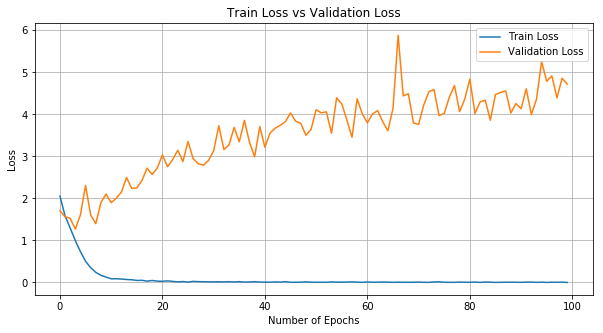

In [14]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

#### Visualizing Training Accuracy & Validation Accuracy

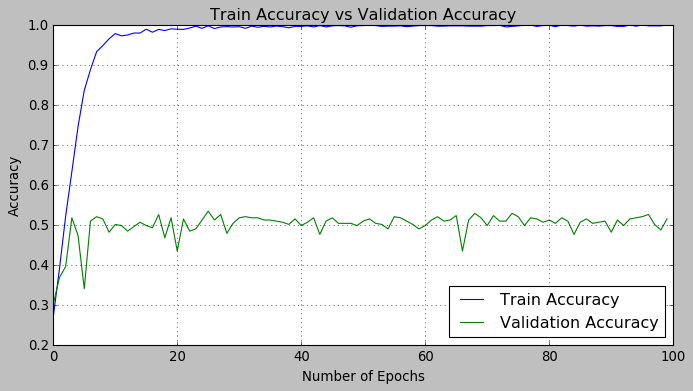

In [15]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

### 4. Evaluating the model & Predicting the output class of a test image

In [16]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 4.719305637470573
Test Accuracy: 0.5152354575590413


Now let use a test image and predict the probability of this image belonging to which class.Let us find out 

In [17]:
test_image = X_test[0:1]
print (test_image.shape)
print(cnn_model.predict(test_image))
print(cnn_model.predict_classes(test_image))
print(y_test[0:1])

(1, 128, 128, 1)
[[2.4790712e-05 5.2952854e-11 8.6738986e-15 8.3880862e-18 9.9997520e-01
  5.3258213e-16 5.4163793e-09]]
[4]
[[1. 0. 0. 0. 0. 0. 0.]]


So based on the above results it is evident that predict class is 1 .In this case it is a car. Let us visualise it .

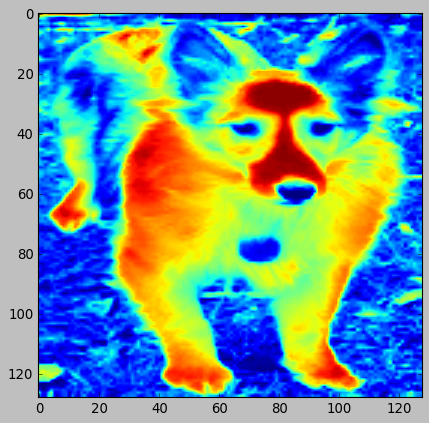

In [18]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

### Test with a new image 

In [19]:
test_img = cv2.imread('../input/data/data/human/rider-104.jpg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img,(128,128))
test_img = np.array(test_img)
test_img = test_img.astype('float32')
test_img /= 255
print(test_img.shape)

(128, 128)


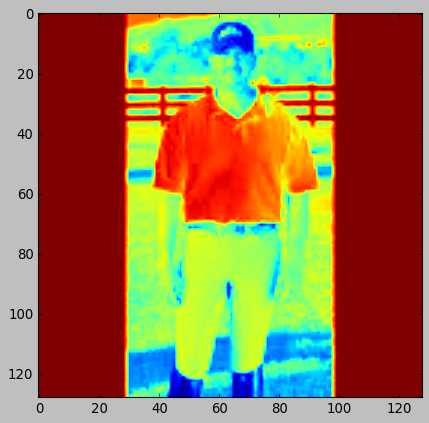

In [20]:
image = test_img.reshape((128,128))
plt.imshow(image)
plt.show()

In [21]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_img= np.expand_dims(test_img, axis=0)
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)
	else:
		test_img= np.expand_dims(test_img, axis=3) 
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_img=np.rollaxis(test_img,2,0)
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)
	else:
		test_img= np.expand_dims(test_img, axis=0)
		print (test_img.shape)
		
# Predicting the test image
print((cnn_model.predict(test_img)))
print(cnn_model.predict_classes(test_img))

(1, 128, 128, 1)
[[1.0000000e+00 3.1579245e-20 3.6519487e-16 8.6402414e-20 7.2590829e-16
  9.6506794e-16 9.4283345e-18]]
[0]


So from the above prediction it is evident that the model predict the class as human for the test image that we have picked up .

### 5. Visualizing the intermediate layer output of CNN

In [22]:
def get_featuremaps(cnn_model, layer_idx, X_batch):
	get_activations = K.function([cnn_model.layers[0].input, K.learning_phase()],[cnn_model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations
layer_num=3
filter_num=0
activations = get_featuremaps(cnn_model, int(layer_num),test_img)
print (np.shape(activations))

(1, 1, 63, 63, 32)


In [23]:
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

(63, 63, 32)


In [24]:
if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

(63, 63, 32)


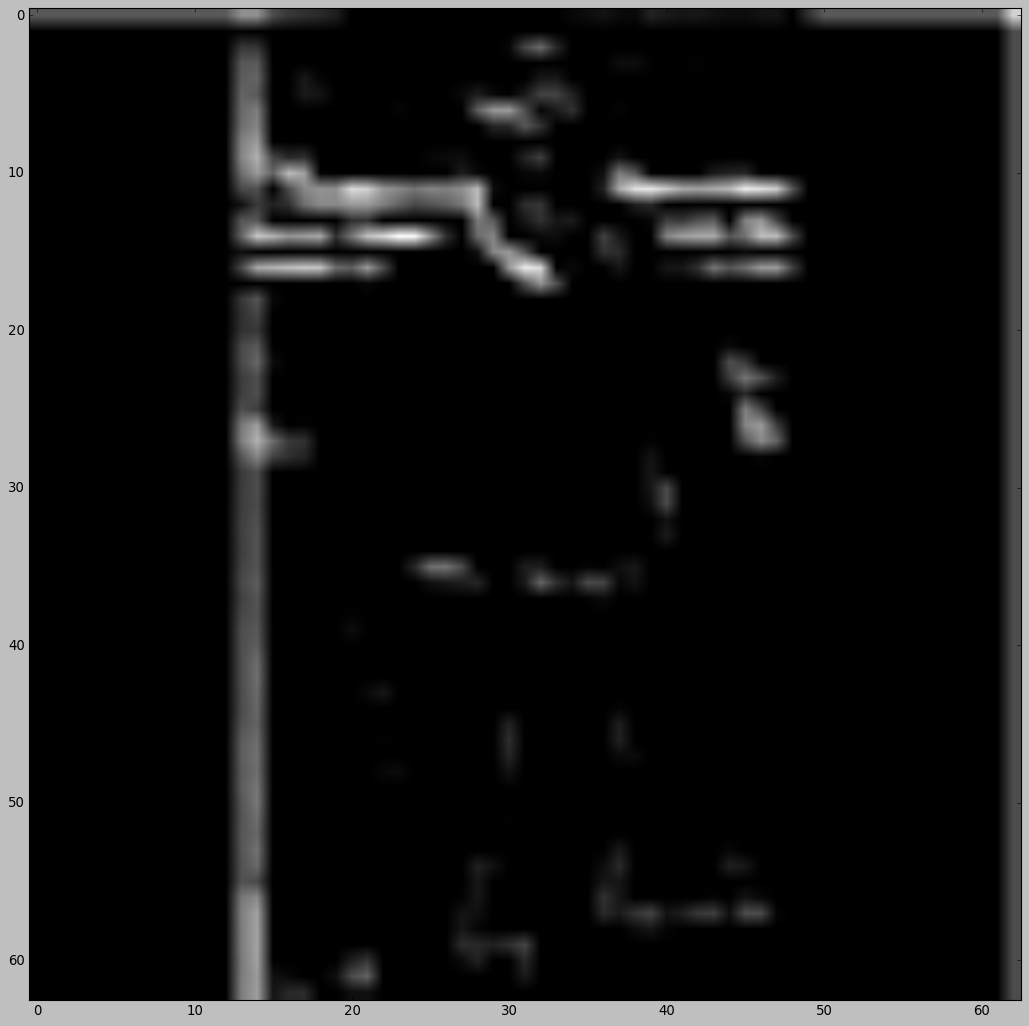

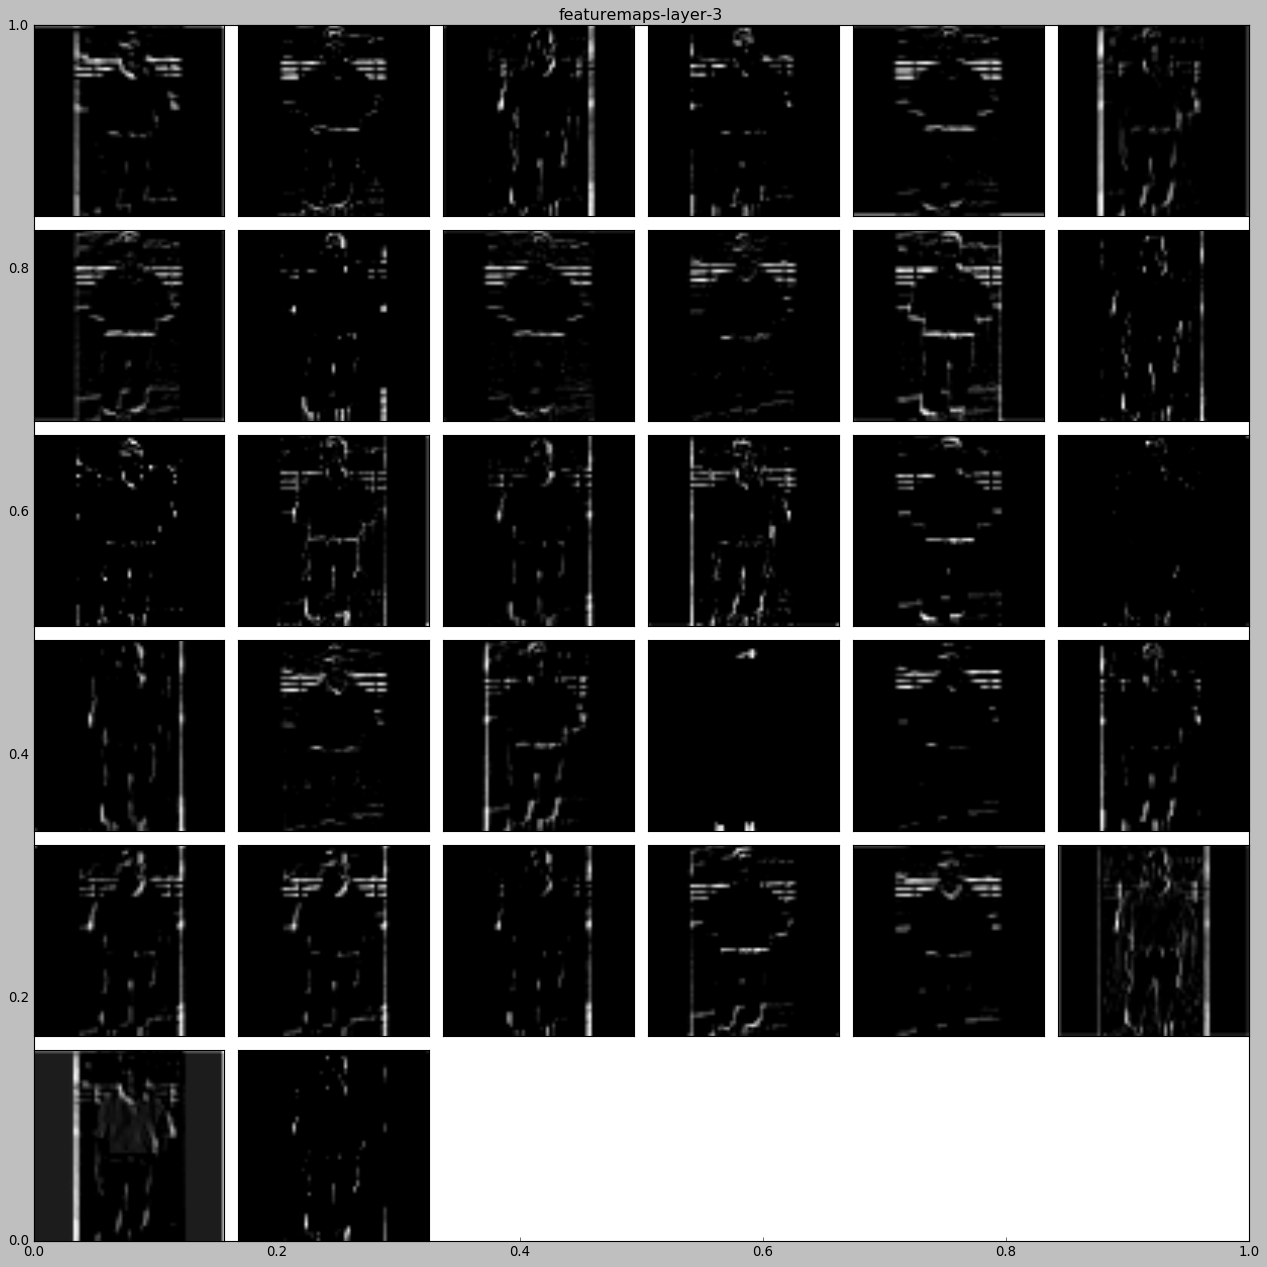

In [25]:
fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()

### 6. Plotting the confusion matrix to observe the result

In [26]:
# Print the confusion matrix
Y_pred = cnn_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
target_names=['Class 0 (flowers)', 'Class 1 (cars)', 'Class 2 (cats)', 'Class 3 (horses)',
              'Class 4 (human)', 'Class 5 (bike)', 'Class 6 (dogs)']
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_names))

[[2.47909720e-05 5.29524515e-11 8.67396551e-15 ... 9.99975204e-01
  5.32584195e-16 5.41646239e-09]
 [1.91645756e-01 1.48791742e-05 5.61989236e-06 ... 1.40687311e-03
  8.03688943e-01 3.23741650e-03]
 [1.00000000e+00 5.31114678e-22 6.11767427e-19 ... 1.00250134e-16
  3.82021868e-18 6.19017338e-24]
 ...
 [4.34197225e-02 9.88208689e-03 7.98179030e-01 ... 1.89551122e-06
  5.24298375e-05 1.23457037e-01]
 [1.59778962e-21 7.38325331e-30 3.36451188e-24 ... 1.00000000e+00
  6.81827811e-27 3.49445738e-24]
 [2.85869718e-01 3.96626264e-01 3.13844293e-01 ... 2.76703213e-06
  3.60928476e-03 4.76770983e-05]]
[4 5 0 4 0 5 0 3 2 1 2 4 0 2 2 2 2 6 0 2 6 1 0 3 4 1 0 2 2 0 0 0 0 2 0 2 1
 2 3 0 2 2 0 1 4 2 3 2 0 2 1 5 2 1 2 4 6 2 4 0 2 6 2 6 2 3 3 0 2 1 0 0 6 0
 5 1 0 6 2 0 0 4 6 0 2 5 0 0 5 0 2 0 2 2 2 5 2 1 2 4 3 2 3 0 2 1 0 4 3 6 2
 4 3 1 6 2 2 0 4 0 1 0 3 2 0 0 0 5 2 4 4 6 6 0 0 0 0 6 4 0 4 2 4 0 0 2 5 2
 0 4 5 1 2 2 0 0 2 3 2 3 4 3 0 1 2 1 2 2 4 4 4 4 4 0 2 0 3 3 4 4 2 3 2 0 2
 0 4 5 2 3 2 5 5 2 1 0 1 

As shown above in the classification report the recall shows the individual class accuracy.In this case horse and dogs have a very low class accuracy of 0.38 and 0.32 respectively.

In [27]:
print('Confusion Matrix \n')
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

Confusion Matrix 

[[51  2  5  3  3  4  4]
 [ 8 10 22  1  1  0  2]
 [ 2 14 48 11  0  1  0]
 [ 3  1 29 13  1  0  1]
 [ 5  0  0  0 35  3  1]
 [10  0  0  0  1 23  1]
 [19  3  3  1 10  0  6]]


From the above confusion matrix each row represents a class .For example let us look at the first row where it shows 37 images are classified for class 0 (flowers) and rest across other classes. To visualise this in a more understandable format let us plot it using matplotlib library as below 

**Plotting the confusion matrix**

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix with Normalization")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Plot non-normalized confusion matrix

Confusion matrix without normalization
[[51  2  5  3  3  4  4]
 [ 8 10 22  1  1  0  2]
 [ 2 14 48 11  0  1  0]
 [ 3  1 29 13  1  0  1]
 [ 5  0  0  0 35  3  1]
 [10  0  0  0  1 23  1]
 [19  3  3  1 10  0  6]]


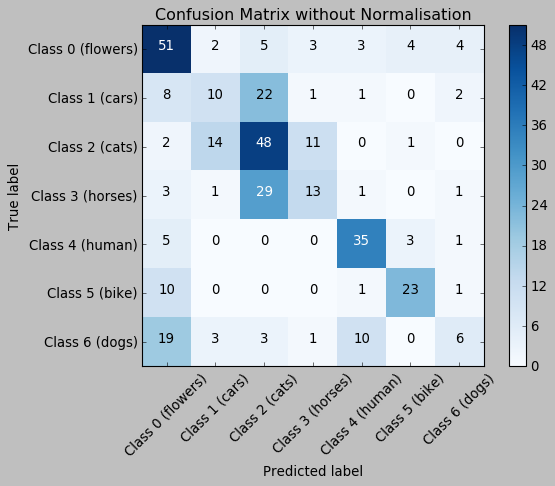

In [29]:
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion Matrix without Normalisation')
plt.show()

Now let us plot confusion matrix with normalization which means all values will lie between 0 and 1.
**Plot normalized confusion matrix**

Confusion matrix with Normalization
[[0.71 0.03 0.07 0.04 0.04 0.06 0.06]
 [0.18 0.23 0.5  0.02 0.02 0.   0.05]
 [0.03 0.18 0.63 0.14 0.   0.01 0.  ]
 [0.06 0.02 0.6  0.27 0.02 0.   0.02]
 [0.11 0.   0.   0.   0.8  0.07 0.02]
 [0.29 0.   0.   0.   0.03 0.66 0.03]
 [0.45 0.07 0.07 0.02 0.24 0.   0.14]]


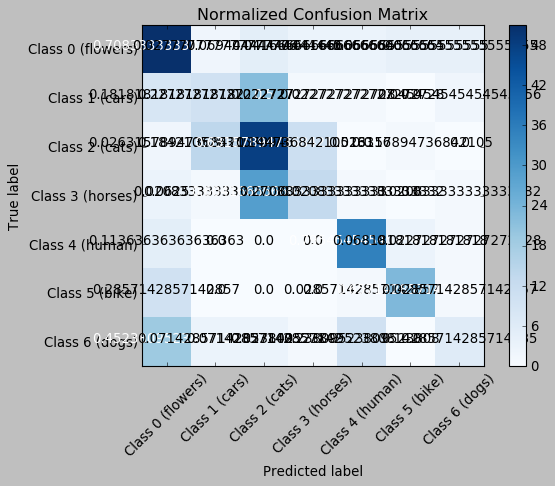

<Figure size 640x480 with 0 Axes>

In [30]:
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized Confusion Matrix')
plt.figure()
plt.show()

## I hope by now you are able to completely understand how to do Object Recognition using deep learning CNN model.

# Please do leave your comments/suggestions and you like this kernel greatly appreciate to UPVOTE.
